In [26]:
import hypernetx as hnx
import matplotlib as mp
import matplotlib.pyplot as plt
import networkx as nx
import qf.cc
import qf.graphs
import qf.morph
%matplotlib inline

In [2]:
def add_directed_hyperedge(H, sources, target):
    H.add_edge(hnx.Entity(H.number_of_edges(), sources + [target], props={'target': target}))

def add_directed_hyperedges(H, stpairs):
    for st in stpairs:
        add_directed_hyperedge(H, st[0], st[1])

In [53]:
def hg2g(H):
    G = nx.MultiDiGraph()
    G.add_nodes_from([x.uid for x in H.nodes()])
    G.add_nodes_from([x.uid for x in H.edges()])
    for h in H.edges():
        target = h.props['target']
        for i,e in enumerate(h.elements):
            if e != target:
                G.add_edge(e, h.uid, label='(%s,%d,%s)' % (e, i, h.uid))
            else:
                G.add_edge(h.uid, e, label='(%s,%s)' % (h.uid, e))
    return G

In [54]:
posDict = {}
def visualize_hg(H, colors = None):
    if colors is None:
        colors = {v.uid: 0 for v in H.nodes()}
    cols = qf.util.colors(max(set(colors.values()))+1)
    ax = plt.axes()
    if H in posDict:
        posnodes = posDict[H]
    else:
        posnodes = hnx.drawing.rubber_band.layout_node_link(H)
        posDict[H] = posnodes
    hnx.drawing.draw(H, 
                 pos = posnodes, ax=ax,
                 with_edge_labels=False,
                 edges_kwargs={
                     'edgecolors': 'black'
                 },
                 nodes_kwargs={
                     'facecolors': [cols[colors[v.uid]] for v in H.nodes()]
                 }
                )
    for h in H.edges():
        target = h.props['target']
        xtarget = posnodes[target][0]
        ytarget = posnodes[target][1]
        for e in h.elements:
            if e != target:
                xsource = posnodes[e][0]
                ysource = posnodes[e][1]
                dx = xtarget - xsource
                dy = ytarget - ysource
                ax.arrow(xsource, ysource, dx, dy, head_width=.03, head_length=.03, length_includes_head=True, linestyle="dotted")
    plt.show()
    

In [55]:
H = hnx.Hypergraph()
add_directed_hyperedges(H, [
    (['FN'], 'TH'),
    (['TH'], 'JV'),
    (['BM', 'FN'], 'JA'),
    (['JV', 'JU', 'CH'], 'BM'),
    (['JU', 'CH', 'BR', 'CN', 'CC', 'JV'], 'BM'),
    (['TH'], 'GP'),
    (['GP'], 'MP'),
    (['MA'], 'GP')
])

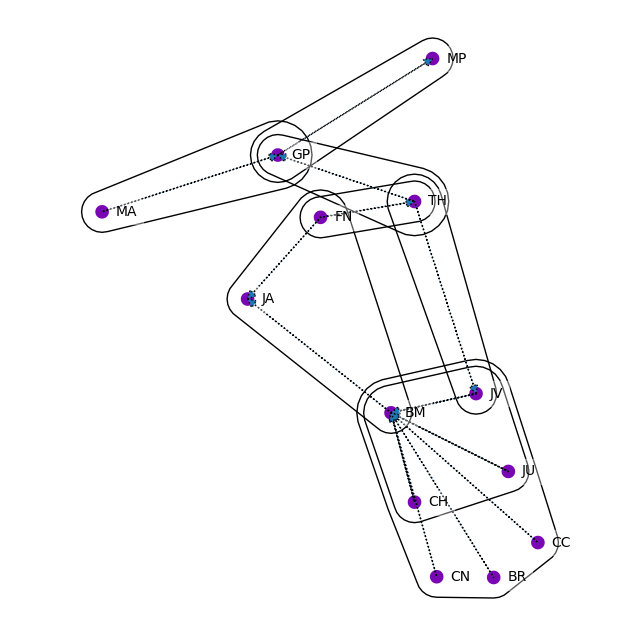

In [56]:
visualize_hg(H)

In [57]:
G = hg2g(H)
cc = qf.cc.cardon_crochemore(G)
#qf.graphs.visualize(G, cc)

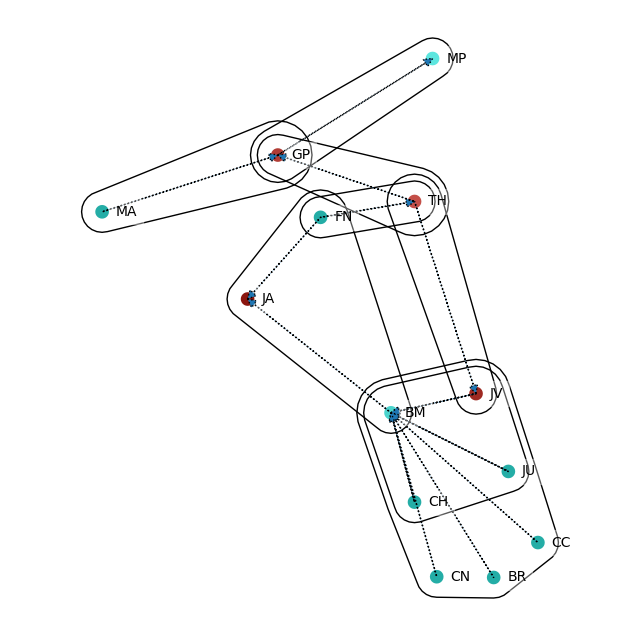

In [58]:
visualize_hg(H, cc)

In [59]:
H = hnx.Hypergraph()
n = 10
d = 3
for x in range(n):
    s = []
    for y in range(d):
        s += ["A{}".format((x+y) % n)]
    add_directed_hyperedge(H, s, "B")


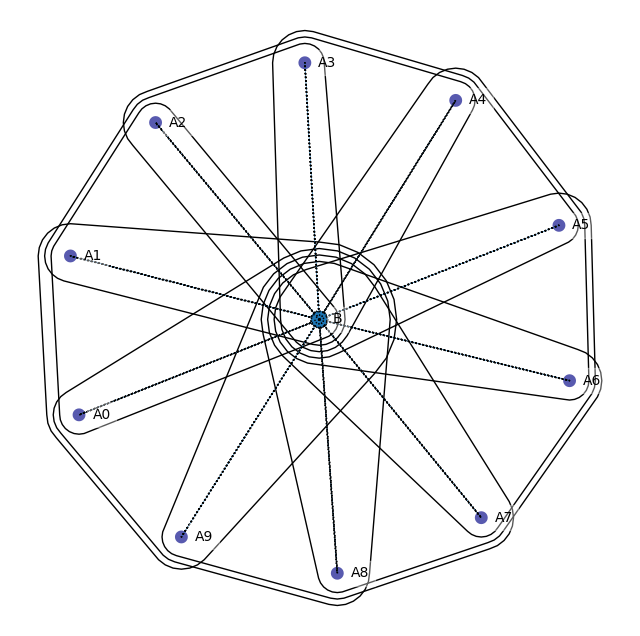

In [60]:
cc = qf.cc.cardon_crochemore(hg2g(H))
visualize_hg(H, cc)

In [61]:
add_directed_hyperedge(H, ["B", "A7", "A9"], "A6")

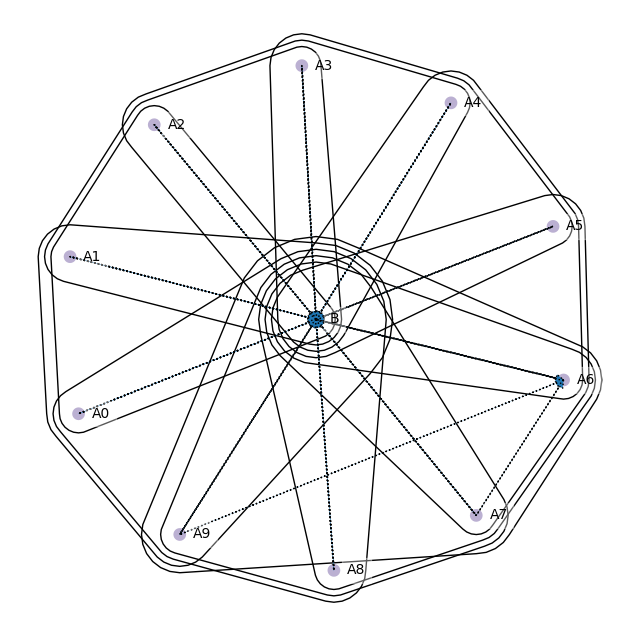

In [62]:
visualize_hg(H)

In [64]:
cc[10]=cc[0]
qf.morph.qf_build(hg2g(H), cc, verbose=True)

1 -> 0: [10] median 10 [[[(0, 'B'), (1, 'B'), (2, 'B'), (3, 'B'), (4, 'B'), (5, 'B'), (6, 'B'), (7, 'B'), (8, 'B'), (9, 'B')]]]
0 -> 1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] median 0 [[[], [], [], [], [], [], [], [], [], [], [('B', 10)]]]
2 -> 1: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2] median 3 [[[('A0', 0), ('A1', 0), ('A2', 0)], [('A1', 1), ('A2', 1), ('A3', 1)], [('A2', 2), ('A3', 2), ('A4', 2)], [('A3', 3), ('A4', 3), ('A5', 3)], [('A4', 4), ('A5', 4), ('A6', 4)], [('A5', 5), ('A6', 5), ('A7', 5)], [('A6', 6), ('A7', 6), ('A8', 6)], [('A7', 7), ('A8', 7), ('A9', 7)], [('A0', 8), ('A8', 8), ('A9', 8)], [('A0', 9), ('A1', 9), ('A9', 9)], [('A7', 10), ('A9', 10)]]]
1 -> 2: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0] median 0 [[[], [], [], [], [], [], [(10, 'A6')], [], [], []]]


(<networkx.classes.multidigraph.MultiDiGraph at 0x1362fffa0>,
 {'A0': 2,
  'A1': 2,
  'A2': 2,
  'B': 0,
  'A3': 2,
  'A4': 2,
  'A5': 2,
  'A6': 2,
  'A7': 2,
  'A8': 2,
  'A9': 2,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  '(0,B)': '1_0_0',
  '(1,B)': '1_0_1',
  '(2,B)': '1_0_2',
  '(3,B)': '1_0_3',
  '(4,B)': '1_0_4',
  '(5,B)': '1_0_5',
  '(6,B)': '1_0_6',
  '(7,B)': '1_0_7',
  '(8,B)': '1_0_8',
  '(9,B)': '1_0_9',
  '(B,0,10)': 'NONE',
  '(A0,0,0)': '2_1_0',
  '(A1,1,0)': '2_1_1',
  '(A2,2,0)': '2_1_2',
  '(A1,0,1)': '2_1_0',
  '(A2,1,1)': '2_1_1',
  '(A3,2,1)': '2_1_2',
  '(A2,0,2)': '2_1_0',
  '(A3,1,2)': '2_1_1',
  '(A4,2,2)': '2_1_2',
  '(A3,0,3)': '2_1_0',
  '(A4,1,3)': '2_1_1',
  '(A5,2,3)': '2_1_2',
  '(A4,0,4)': '2_1_0',
  '(A5,1,4)': '2_1_1',
  '(A6,2,4)': '2_1_2',
  '(A5,0,5)': '2_1_0',
  '(A6,1,5)': '2_1_1',
  '(A7,2,5)': '2_1_2',
  '(A6,0,6)': '2_1_0',
  '(A7,1,6)': '2_1_1',
  '(A8,2,6)': '2_1_2',
  '(A7,0,7)': '2_1_0',
 

In [29]:
cc

{'A0': 2,
 'A1': 2,
 'A2': 2,
 'B': 0,
 'A3': 2,
 'A4': 2,
 'A5': 2,
 'A6': 2,
 'A7': 2,
 'A8': 2,
 'A9': 2,
 0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1}

In [30]:
hg2g(H).nodes()

NodeView(('A0', 'A1', 'A2', 'B', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))